# Telecom Churn Case Study

### Business Problem
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

### Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

We will divide the dataset in training and test set as:

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months

## Understanding customer behaviour during churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :
- Good Phase: Happy with the services
- Action Phase: Getting good offers from competitor, charging extra charges, unhappy services, etc.
- Churn phase: Customer is said to have churned.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Data Preparation
1. Derive new features

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After filtering the high-value customers, you should get about 29.9k rows.


3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


### steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. **Note that it is more important to identify churners than the non-churners accurately** - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.


### Final
After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.
Finally, recommend strategies to manage customer churn based on your observations.

In [1]:
# importing the requisite libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Importing and Understanding

In [2]:
#  impporting the dataset
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
# checking the imported data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# checking the shape of the dataset
df.shape

(99999, 226)

In [5]:
# checking the datatypes of all the columns in the dataset
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [6]:
# checking for the missing values into the columns

null_val_col = round(df.isnull().sum()/len(df.index) * 100, 2)
null_val_col

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [7]:
# replacing columns with null value percentage greater than 70%

cols_to_replace = null_val_col[null_val_col >  70].index
len(cols_to_replace)

40

In [8]:
#dropping the columns which have null values percentage greater than 70%

df.drop(columns = cols_to_replace, axis=1, inplace = True)

In [9]:
# after dropping it checking the shape
df.shape

(99999, 186)

In [10]:
# calculate the avg recharge amt of june, and july

df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.4

In [11]:
# calculating the 70th percentile value of avg_rech_amt_6_7 column
seventy_percentile = np.percentile(df['avg_rech_amt_6_7'], 70)
print(seventy_percentile)

368.5


In [12]:
#Filtering out the high-value customers and allocating that in the new dataframe

new_df = df[df['avg_rech_amt_6_7'] >= seventy_percentile]

In [13]:
# checking the shape of the high value customer 
new_df.shape

(30011, 187)

In [14]:
new_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,

### Creating churn column and tagging 1 and 0 for the churner and non-churner respectively based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes using to tag churners are:

1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9


In [15]:
# creating churn column and tagging 1 and 0 for the churner and non-churner respectively based on the following condition

new_df['churn'] = np.where((new_df['total_ic_mou_9'] ==0) 
                            & (new_df['total_og_mou_9'] == 0) 
                            & (new_df['vol_2g_mb_9'] == 0) 
                            & (new_df['vol_3g_mb_9'] == 0), 1, 0)

In [16]:
# checking the churn column

new_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,

In [17]:
# Checking the churning percentage

churn_rate = new_df['churn'].sum()/len(new_df) * 100
churn_rate

8.64016527273333

### Dropping all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)


In [18]:
# listing out the columns having ‘ _9’, etc. in their names 

churn_columns = [col for col in new_df.columns if col.endswith('_9')]
print(churn_columns)
print(len(churn_columns))

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
44


In [19]:
# dropping all the listed columns which have ‘ _9’, etc. in their names 

new_df.drop(columns = churn_columns, axis=1, inplace = True)

In [20]:
# dropping 'sep_vbc_3g' column as it is also the data of 9th month

new_df.drop(columns='sep_vbc_3g', axis=1, inplace = True)

In [21]:
new_df.shape

(30011, 143)

In [22]:
round(new_df.isnull().sum()/len(new_df) * 100, 2).sort_values(ascending = False)

loc_ic_mou_8            3.13
og_others_8             3.13
loc_og_t2f_mou_8        3.13
loc_ic_t2t_mou_8        3.13
spl_og_mou_8            3.13
loc_og_t2m_mou_8        3.13
loc_ic_t2m_mou_8        3.13
loc_ic_t2f_mou_8        3.13
loc_og_t2t_mou_8        3.13
std_og_t2f_mou_8        3.13
roam_og_mou_8           3.13
loc_og_mou_8            3.13
std_ic_t2t_mou_8        3.13
roam_ic_mou_8           3.13
isd_og_mou_8            3.13
std_ic_t2m_mou_8        3.13
offnet_mou_8            3.13
std_ic_t2f_mou_8        3.13
onnet_mou_8             3.13
std_og_t2t_mou_8        3.13
std_ic_t2o_mou_8        3.13
std_og_mou_8            3.13
std_ic_mou_8            3.13
spl_ic_mou_8            3.13
std_og_t2m_mou_8        3.13
isd_ic_mou_8            3.13
std_og_t2c_mou_8        3.13
ic_others_8             3.13
loc_og_t2c_mou_8        3.13
date_of_last_rech_8     1.98
isd_og_mou_6            1.05
spl_og_mou_6            1.05
std_og_mou_6            1.05
loc_ic_t2f_mou_6        1.05
loc_ic_t2t_mou

In [23]:
# checking the columns where the 'date' in their name

date_columns = [col for col in new_df.columns if 'date' in col]
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [24]:
# dropping the above columns as these columns have no usage in analysis

new_df.drop(columns=date_columns, axis=1, inplace=True)

In [25]:
# checking the shape of the data

new_df.shape

(30011, 137)

In [26]:
# dropping all the rows which contains null values

new_df.dropna(inplace=True)

In [27]:
# checking the shape of the data
new_df.shape

(28861, 137)

In [28]:
# checking the missing value percentage in the data

round(new_df.isnull().sum()/len(new_df) * 100, 2).sort_values(ascending = False)

mobile_number         0.0
spl_ic_mou_8          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
isd_ic_mou_6          0.0
loc_ic_t2f_mou_7      0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
total_rech_num_6      0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
monthly_2g_8          0.0
avg_rech_amt_6_7      0.0
jun_vbc_3g  

As we can see, there is no null values in the column in the dataset

In [29]:
# checking the churn rate

round(new_df['churn'].sum()/len(new_df)*100,2)

6.26

The churn rate is 6.26%

In [30]:
# checking the same value columns in dataset 

same_val_cols = []
for i in new_df.columns:
    if new_df[i].nunique() == 1:
        same_val_cols.append(i)
    else:
        pass


    
print(same_val_cols)
print(len(same_val_cols))
    
    

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
10


In [31]:
# dropping the same value columns from the dataset as these columns will be not impacting on the analysis

new_df.drop(same_val_cols, axis=1, inplace=True)

In [32]:
# checking the shape of the dataset

new_df.shape

(28861, 127)

In [33]:
new_df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn
count,2.886100e+04,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.00000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.00000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.00000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000
mean,7.001229e+09,583.567951,594.558340,548.296744,296.272163,309.163947,275.867752,418.632928,431.588700,386.862307,17.350686,13.622360,13.641925,29.124845,22.141013,22.149123,96.345587,98.439796,90.381558,183.901342,185.87273,173.683376,7.124348,7.271403,6.707281,1.579216,1.878539,1.765744,287.38021,291.593068,270.780934,188.470207,201.959683,176.959112,201.182936,216.136208,184.471419,2.034966,2.073900,1.849584,391.692477,420.174180,363.284144,2.067312,2.142616,2.034974,5.926283,7.534818,7.103449,0.687966,0.048995,0.061

### Let's Check the Multicollinearity

In [34]:
## checking the multicollinearity in the dataset\

new_df_corr = new_df.corr().unstack().sort_values(ascending=False).drop_duplicates()
high_corr = new_df_corr[(new_df_corr> 0.80)& (new_df_corr < 1)]
print(high_corr)

arpu_8            total_rech_amt_8    0.952428
isd_og_mou_8      isd_og_mou_7        0.949632
                  isd_og_mou_6        0.948683
isd_og_mou_7      isd_og_mou_6        0.939726
arpu_6            total_rech_amt_6    0.938991
total_rech_amt_7  arpu_7              0.937995
                  avg_rech_amt_6_7    0.907808
avg_rech_amt_6_7  arpu_7              0.904624
total_rech_amt_6  avg_rech_amt_6_7    0.895433
total_ic_mou_6    loc_ic_mou_6        0.894436
total_ic_mou_8    loc_ic_mou_8        0.887942
arpu_6            avg_rech_amt_6_7    0.885041
total_ic_mou_7    loc_ic_mou_7        0.881230
std_og_t2t_mou_8  onnet_mou_8         0.853969
loc_ic_mou_8      loc_ic_t2m_mou_8    0.850716
std_og_t2m_mou_7  offnet_mou_7        0.849985
loc_ic_mou_6      loc_ic_t2m_mou_6    0.848729
std_og_t2t_mou_7  onnet_mou_7         0.848478
std_ic_mou_8      std_ic_t2m_mou_8    0.846784
onnet_mou_6       std_og_t2t_mou_6    0.846612
offnet_mou_8      std_og_t2m_mou_8    0.846435
std_og_mou_8 

## Deriving new features

In [35]:
# List the columns of total mou, rech_num and rech_amt

[cols for cols in new_df.columns.to_list() if 'total_' in cols]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [36]:
# creating new column avgerage mou at good phase incoming and outgoing
# taking avg as there are 2 months(6 and 7) in good phase
new_df['avg_mou_good'] = (new_df['total_ic_mou_6'] + new_df['total_og_mou_6'] 
                            + new_df['total_ic_mou_7'] + new_df['total_og_mou_7']) /2

In [37]:
# creating new column of total mou at action phase

new_df['total_mou_action'] = new_df['total_og_mou_8'] + new_df['total_ic_mou_8']

In [38]:
# Difference between avg_mou_good and total_mou_action
new_df['diff_mou'] = new_df['total_mou_action'] - new_df['avg_mou_good']

In [39]:
# checking whether the mou has decreased in the action phase 
new_df['decrease_mou_action'] = np.where((new_df['diff_mou'] <0), 1, 0)

In [40]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1140.635,778.90,-361.735,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1120.345,2159.79,1039.445,0
16,7000875565,430.975,299

#### Deriving new column `decrease_rech_num_action`
This column indicates whether numbers of recharge of the customer has decreased in the action phase than the good phase.

In [41]:
# creating new column of avgerage recharge number at good phase
# taking avg as there are two months(6 and 7) in good phase

new_df['avg_rech_num_good'] = (new_df['total_rech_num_6'] + new_df['total_rech_num_7']) / 2

In [42]:
# Difference between total_rech_num_8 and avg_rech_num_good
new_df['diff_rech_num'] = new_df['total_rech_num_8'] - new_df['avg_rech_num_good']

In [43]:
# checking whether the recharge number has decreased in the action phase 
new_df['decrease_rech_num_action'] = np.where((new_df['diff_rech_num'] <0), 1, 0)

In [44]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1140.635,778.90,-361.735,1,5.0,2.0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1,20.0,-6.0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,26

#### Deriving new column `decrease_rech_amt_action`
This column indicates whether amount of recharge of the customer has decreased in the action phase than the good phase.

In [45]:
# Difference between total_rech_amt_8 and avg_rech_amt_good
new_df['diff_rech_amt'] = new_df['total_rech_amt_8'] - new_df['avg_rech_amt_6_7']

In [46]:
# checking whether the recharge amount has decreased in the action phase 
new_df['decrease_rech_amt_action'] = np.where((new_df['diff_rech_amt'] <0), 1, 0)

In [47]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1140.635,778.90,-361.735,1,5.0,2.0,0,2453.0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1,20.0,-6.0,1,-399.0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,5

#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per user has decreased in the action phase than the good phase.

In [48]:
# List the columns of average revenue per users

[cols for cols in new_df.columns.to_list() if 'arpu' in cols]

['arpu_6', 'arpu_7', 'arpu_8']

In [49]:
# ARPU in good phase
new_df['avg_arpu_good'] = (new_df['arpu_6'] + new_df['arpu_7'])/2

In [50]:
# Difference of good and action phase ARPU
new_df['diff_arpu'] = new_df['arpu_8'] - new_df['avg_arpu_good']

In [51]:
# Checking whether the arpu has decreased on the action month
new_df['decrease_arpu_action'] = np.where(new_df['diff_arpu'] < 0, 1, 0)

In [52]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1140.635,778.90,-361.735,1,5.0,2.0,0,2453.0,0,1209.5150,1961.9650,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1,20.0,-6.0,1,-399.0,1,435.4720,-298.1100,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53

#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [53]:
# List the columns of volume based cost

[cols for cols in new_df.columns.to_list() if 'vbc' in cols]

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [54]:
# VBC in good phase
new_df['avg_vbc_3g_good'] = (new_df['jun_vbc_3g'] + new_df['jul_vbc_3g'])/2

In [55]:
# Difference of good and action phase VBC
new_df['diff_vbc'] = new_df['aug_vbc_3g'] - new_df['avg_vbc_3g_good']

In [56]:
# Checking whether the VBC has decreased on the action month
new_df['decrease_vbc_action'] = np.where(new_df['diff_vbc'] < 0 , 1, 0)

In [57]:
# checking the dataset
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1140.635,778.90,-361.735,1,5.0,2.0,0,2453.0,0,1209.5150,1961.9650,0,19.060,38.680,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1,20.0,-6.0,1,-399.0,1,435.4720,-298.1100,1,516.405,-495.375,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154

## EDA

### Univariate Analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [58]:
# creating pivot table with aggregate function
new_df.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean')

,churn
decrease_mou_action,
0,0.020509
1,0.094917


<Axes: xlabel='decrease_mou_action'>

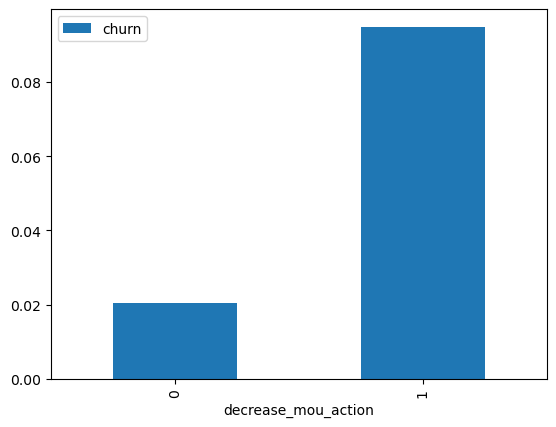

In [59]:
# creating pivot table with aggregate function and plotting bar graph
new_df.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

<Axes: xlabel='decrease_rech_num_action'>

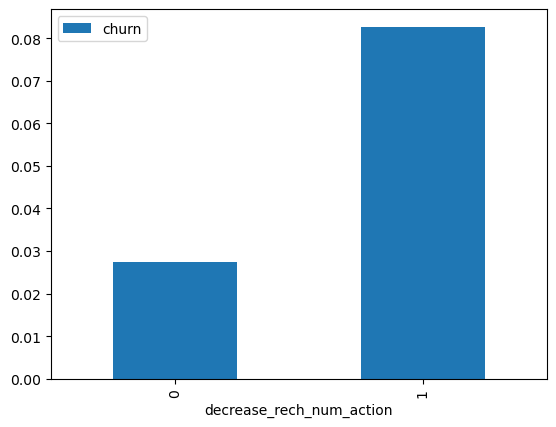

In [60]:
# creating pivot table with aggregate function and plotting bar graph
new_df.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()

***Analysis***

We can see that the churn rate is more for the customers, whose number of recharge decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

<Axes: xlabel='decrease_rech_amt_action'>

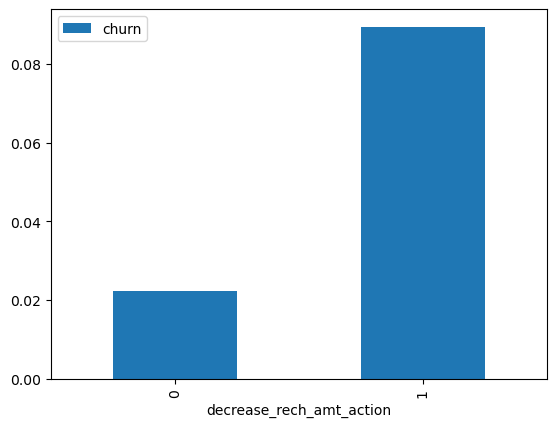

In [61]:
# creating pivot table with aggregate function and plotting bar graph
new_df.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()

***Analysis***

We can see that the churn rate is more for the customers, whose amount of recharge decreased in the action phase than the good phase.

##### Churn rate on the basis whether the customer decreased her/his average revenue per user in action month

<Axes: xlabel='decrease_arpu_action'>

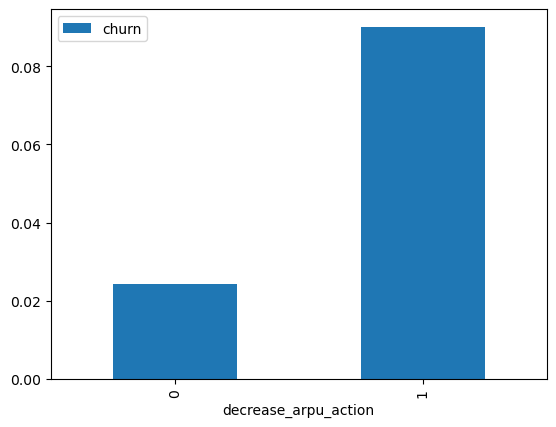

In [62]:
# creating pivot table with aggregate function and plotting bar graph
new_df.pivot_table(values='churn', index='decrease_arpu_action', aggfunc='mean').plot.bar()

***Analysis***

We can see that the churn rate is more for the customers, whose average revenue per user decreased in the action phase than the good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

<Axes: xlabel='decrease_vbc_action'>

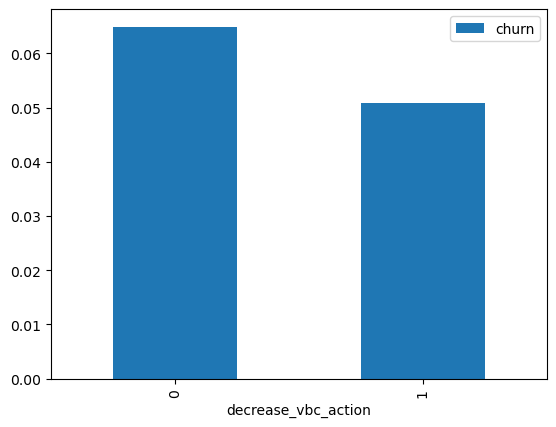

In [63]:
# creating pivot table with aggregate function and plotting bar graph
new_df.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()

***Analysis***

The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

### Bivariate Analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

In [64]:
# creating pivot table using decrease_rech_amt_action as index, decrease_rech_num_action as column, and taking value of churn with mean
new_df.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean')

decrease_rech_num_action,0,1
decrease_rech_amt_action,,
0,0.022081,0.022748
1,0.039295,0.101030


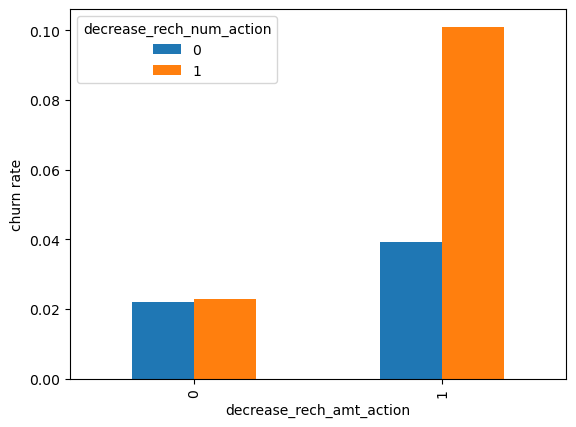

In [65]:
#plotting bar graph of pivoted table
new_df.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

decrease_vbc_action              0         1
decrease_rech_amt_action                    
0                         0.021708  0.025943
1                         0.094721  0.064836


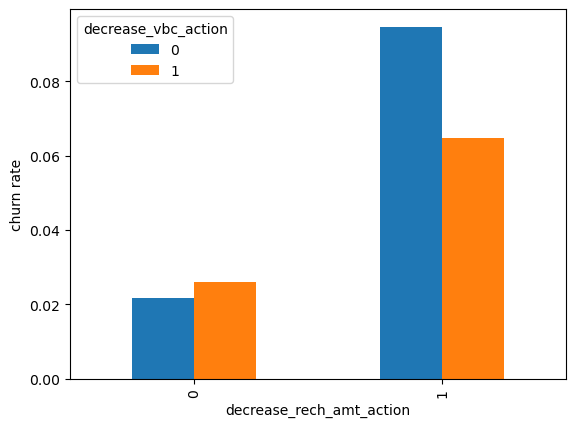

In [66]:
# creating pivot table using decrease_rech_amt_action as index, decrease_vbc_action as column, and taking value of churn with mean
print(new_df.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean'))

#plotting bar graph of the pivoted table
new_df.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Dropping few derived columns, which are not required in further analysis

In [67]:
## checking the multicollinearity in the dataset\

new_df_corr = new_df.corr().unstack().sort_values(ascending=False).drop_duplicates()
high_corr = new_df_corr[(new_df_corr> 0.80)& (new_df_corr < 1)]
print(high_corr)

avg_rech_amt_6_7   avg_arpu_good        0.975021
arpu_8             total_rech_amt_8     0.952428
isd_og_mou_7       isd_og_mou_8         0.949632
isd_og_mou_6       isd_og_mou_8         0.948683
                   isd_og_mou_7         0.939726
arpu_6             total_rech_amt_6     0.938991
arpu_7             total_rech_amt_7     0.937995
jul_vbc_3g         avg_vbc_3g_good      0.925253
avg_arpu_good      arpu_7               0.924017
total_rech_num_7   avg_rech_num_good    0.920709
avg_rech_num_good  total_rech_num_6     0.916873
avg_vbc_3g_good    jun_vbc_3g           0.915815
avg_arpu_good      arpu_6               0.911777
total_rech_amt_7   avg_rech_amt_6_7     0.907808
avg_rech_amt_6_7   arpu_7               0.904624
total_og_mou_8     total_mou_action     0.898476
total_rech_amt_6   avg_rech_amt_6_7     0.895433
loc_ic_mou_6       total_ic_mou_6       0.894436
total_ic_mou_8     loc_ic_mou_8         0.887942
arpu_6             avg_rech_amt_6_7     0.885041
loc_ic_mou_7       t

In [68]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1140.635,778.90,-361.735,1,5.0,2.0,0,2453.0,0,1209.5150,1961.9650,0,19.060,38.680,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1,20.0,-6.0,1,-399.0,1,435.4720,-298.1100,1,516.405,-495.375,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154

## Train-Test Split

In [69]:
# importing requisite library
from sklearn.model_selection import train_test_split

In [70]:
# putiing feature variable to X
X = new_df.drop(['mobile_number', 'churn'], axis=1)

# putting target variable to y
y = new_df['churn']

In [71]:
# splitting the variables into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

## Dealing with Class Imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [72]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

In [73]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)

In [74]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

## Feature Scaling

In [75]:
# importing Standardscaler
from sklearn.preprocessing import StandardScaler

In [76]:
# instantiate the scaler
scaler = StandardScaler()

In [77]:
cols_to_scale = X_train.columns.to_list()

# removing some of the column which contain only binary values (0 and 1)
cols_to_scale.remove('decrease_mou_action')
cols_to_scale.remove('decrease_rech_num_action')
cols_to_scale.remove('decrease_rech_amt_action')
cols_to_scale.remove('decrease_arpu_action')
cols_to_scale.remove('decrease_vbc_action')

In [78]:
# Fit the data into scaler and transform
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [79]:
# checking the scaled data
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
0,3.034740,1.006652,2.031509,-0.250209,0.511513,0.259787,0.487650,0.594105,0.025270,-0.230986,-0.217443,-0.244356,-0.263834,-0.300228,-0.315694,0.662758,2.463777,1.436437,2.671870,2.919769,0.990420,-0.208904,-0.223535,-0.192254,0.174581,-0.198917,-0.038627,2.079808,3.428275,1.516934,-0.522166,-0.517874,-0.396857,-0.557762,-0.540732,-0.416519,-0.154311,-0.135734,-0.12347,-0.759451,-0.742187,-0.545415,-0.055493,-0.055485,-0.045377,0.291206,0.344857,-0.024781,-0.094227,-0.023815,-0.022185,0.220481,0.853176,0.256169,1.197700,1.775010,1.012503,2.377415,0.926463,0.075576,-0.314063,-0.280366,-0.270928,2.223588,1.461281,0.489812,-0.212168,-0.035779,-0.191248,-0.349392,-0.336264,-0.274030,-0.137981,-0.140834,-0.110945,-0.384774,-0.269932,-0.315769,1.686010,1.080785,0.266384,-0.445983,-0.122022,-0.167276,-0.174713,-0.162451,-0.139689,-0.104035,-0.093258,-0.107631,0.998478,-0.146986,0.499914,3.043808,0.785932,1.928571,0.270473,0.582386,0.763130,0.128447,0.495631,0.690104,0.205935,-0.178417,0.036879,2.342470,2.385734,4.908262,3.187959,-0.259367,3.422072,1.653690,-0.282199,0.408981,-0.237952,1.790013,4.328608,2.505245,-0.143270,1.215722,-0.974284,0.940584,1.985488,4.052483,2.113727,1.117469,0.316182,-0.815063,1,0.444724,0.049737,1,0.143794,1,2.201204,0.154917,1,3.217705,-2.989990,1
1,0.075257,-0.419178,-0.343452,-0.153398,-0.410021,-0.377049,-0.208177,-0.318707,-0.229046,-0.129896,-0.209170,-0.144340,1.418221,-0.061500,0.824204,-0.303321,-0.317273,-0.285370,-0.633246,-0.648248,-0.527159,-0.208904,-0.223535,-0.264801,-0.246024,-0.056223,-0.236896,-0.606917,-0.632095,-0.527263,-0.277513,-0.285664,-0.316600,-0.114312,-0.032895,-0.199788,-0.154311,-0.135734,-0.12347,-0.277795,-0.221215,-0.348758,-0.055493,-0.055485,-0.045377,-0.341966,-0.357989,-0.305365,-0.340386,-0.023815,-0.022185,-0.557925,-0.513646,-0.573795,-0.261068,-0.267098,-0.352255,-0.634434,-0.621465,-0.557932,-0.314063,-0.280366,-0.248656,-0.620747,-0.612840,-0.594028,-0.119163

In [80]:
# transforming the test set
X_test[cols_to_scale]= scaler.transform(X_test[cols_to_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
43200,0.816676,0.646157,0.969505,-0.224645,-0.304459,-0.167409,0.170876,0.136959,0.591007,-0.230986,-0.217443,-0.244356,-0.263834,-0.300228,-0.315694,0.478006,0.267017,0.144032,1.265717,1.577504,1.272567,-0.208904,-0.223535,-0.255255,-0.246024,-0.198917,-0.236896,1.082774,1.159759,0.886827,-0.415217,-0.413491,-0.220989,-0.274766,-0.447339,0.099594,-0.154311,-0.135734,-0.123470,-0.486816,-0.604148,-0.087548,-0.055493,-0.055485,-0.045377,-0.341966,-0.357989,-0.288175,-0.340386,-0.023815,-0.022185,0.011367,-0.066763,0.343434,0.955475,0.619434,0.370684,1.806311,1.887823,2.253036,0.412730,-0.084442,0.119109,1.798918,1.625306,1.782165,0.170947,0.500433,0.862495,0.776135,0.541519,0.652192,-0.137981,-0.140834,-0.107311,0.610279,0.656858,0.909977,1.747941,1.601646,1.803657,-0.445983,-0.122022,-0.167276,-0.174713,-0.162451,-0.139689,-0.095519,-0.119175,-0.107631,-0.089439,0.508380,0.499914,0.719327,0.588733,0.980848,0.614720,0.582386,0.763130,0.128447,0.324473,0.495975,-0.210415,-0.248479,0.212898,0.908380,0.238180,1.520033,-0.249353,-0.259367,-0.236255,0.367132,2.022853,-0.282431,1.961177,1.790013,2.055105,-0.137518,-0.14327,-0.118634,1.438082,2.290175,-0.207688,1.758439,0.733954,0.691982,1.000041,0.348060,1,0.204079,0.315346,1,0.437223,1,0.807992,0.343325,1,0.789333,2.042033,0
69487,-0.545076,-0.273235,0.035672,0.457046,0.667020,0.655680,-0.779807,-0.658407,-0.621879,-0.230986,-0.217443,-0.244356,-0.263834,-0.300228,-0.315694,-0.330989,-0.313933,-0.272512,-0.609009,-0.499626,-0.499742,-0.208904,-0.223535,-0.264801,-0.246024,-0.181204,-0.236896,-0.609648,-0.535423,-0.501786,0.658472,0.886692,0.916396,-0.493189,-0.414241,-0.363260,-0.154311,-0.135734,-0.123470,0.119682,0.309735,0.384876,-0.055493,-0.055485,-0.045377,-0.341966,-0.320480,-0.305365,-0.340386,-0.023815,-0.022185,-0.175598,0.040559,0.081560,-0.231262,-0.333164,-0.233815,-0.462505,0.092924,0.003380,-0.314063,-0.280366,-0.143978,-0.482848,-0.136005,-0.127278,-0.094377,-0.04

## PCA on the dataset

In [81]:
# importing PCA
from sklearn.decomposition import PCA

In [82]:
# instantiate PCA
pca = PCA(random_state=42)

In [83]:
# fitting train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [84]:
# fetching components from the PCA
pca.components_

array([[ 1.25553127e-01,  1.51397468e-01,  1.80118337e-01, ...,
         5.93355227e-02,  4.44459806e-03,  1.07370594e-02],
       [ 1.29859479e-01,  1.20495689e-01,  4.19869256e-02, ...,
        -8.82607648e-02,  7.20840251e-03, -2.25550581e-02],
       [ 1.27940177e-01,  1.54554771e-01,  1.65051227e-01, ...,
         1.75806777e-01, -2.96656184e-02,  2.64449400e-02],
       ...,
       [-0.00000000e+00, -9.63266196e-16, -2.83969579e-03, ...,
        -6.76904296e-01,  5.46062652e-02, -4.09201617e-17],
       [ 4.62503793e-01,  4.97000003e-01, -3.45566759e-01, ...,
         3.34069535e-02,  1.98037072e-02, -7.20994445e-18],
       [-0.00000000e+00,  2.18922103e-15,  6.27826480e-01, ...,
         5.42793768e-02,  1.76374803e-02,  8.67361738e-18]])

In [85]:
# looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.08835787e-01, 8.73212347e-02, 5.76886384e-02, 5.17594222e-02,
       4.13464838e-02, 4.03529485e-02, 3.37570426e-02, 3.04568827e-02,
       2.81013127e-02, 2.56074019e-02, 2.37404593e-02, 2.15866453e-02,
       2.01443156e-02, 1.92111462e-02, 1.86369085e-02, 1.75411270e-02,
       1.60337498e-02, 1.50398514e-02, 1.42598839e-02, 1.29910479e-02,
       1.29185030e-02, 1.26268748e-02, 1.21945170e-02, 1.13806176e-02,
       1.04368357e-02, 1.01532196e-02, 9.32605555e-03, 8.67903320e-03,
       8.61039207e-03, 7.78671455e-03, 7.58736183e-03, 7.32751719e-03,
       7.25259865e-03, 7.07895690e-03, 6.67162727e-03, 6.55423322e-03,
       6.47562798e-03, 6.40546956e-03, 6.16600396e-03, 6.06973748e-03,
       5.78247575e-03, 5.05828152e-03, 4.96152820e-03, 4.91813621e-03,
       4.62114396e-03, 4.52356420e-03, 4.26982930e-03, 4.19053574e-03,
       4.14944604e-03, 4.04948629e-03, 3.64146676e-03, 3.60967138e-03,
       3.52002161e-03, 3.44127180e-03, 3.34717399e-03, 3.31848793e-03,
      

In [86]:
# looking at the Cumuliative varinace of the PCs
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu)

[0.10883579 0.19615702 0.25384566 0.30560508 0.34695157 0.38730451
 0.42106156 0.45151844 0.47961975 0.50522715 0.52896761 0.55055426
 0.57069857 0.58990972 0.60854663 0.62608776 0.64212151 0.65716136
 0.67142124 0.68441229 0.69733079 0.70995767 0.72215218 0.7335328
 0.74396964 0.75412286 0.76344891 0.77212795 0.78073834 0.78852505
 0.79611241 0.80343993 0.81069253 0.81777149 0.82444311 0.83099735
 0.83747298 0.84387844 0.85004445 0.85611419 0.86189666 0.86695494
 0.87191647 0.87683461 0.88145575 0.88597932 0.89024915 0.89443968
 0.89858913 0.90263861 0.90628008 0.90988975 0.91340977 0.91685105
 0.92019822 0.92351671 0.92679899 0.9299977  0.9330557  0.93604928
 0.93893669 0.94180575 0.944592   0.94723278 0.94976896 0.95217796
 0.95454496 0.95685466 0.95909266 0.96129415 0.96342141 0.96547786
 0.96745832 0.96939488 0.97118489 0.9729743  0.97468404 0.97630402
 0.9778572  0.97938523 0.98085017 0.98227356 0.98365825 0.98503213
 0.98635095 0.98761472 0.98882916 0.98996454 0.99105918 0.99201

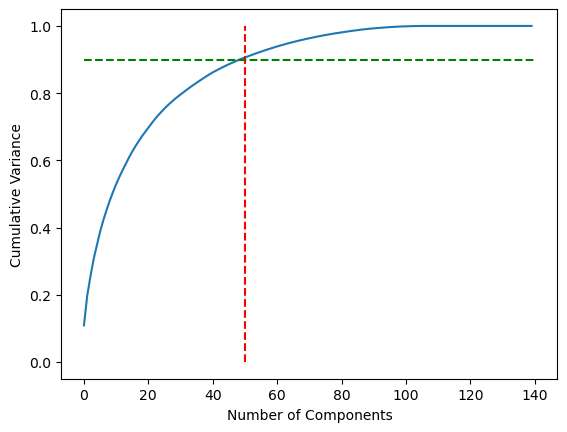

In [87]:
# plotting a scree plot for the explained variance
plt.plot(var_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=140, xmin=0, colors="g", linestyles="--")

We can see that `50 components` explain almost 90% variance of the data. So, we will perform PCA with 50 components.

In [88]:
# importing increamental PCA
from sklearn.decomposition import IncrementalPCA

In [89]:
# instantiate PCA with 50 components
pca_final = IncrementalPCA(n_components=50)

#### Fitting and Transforming the train set

In [90]:
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set


In [91]:
X_test_pca = pca_final.transform(X_test)

## Prioritizing Recall: Focusing on Churn Prevention

As we are more concerned about the churn customers than the not-churn customers, and our main objective is to retain the cutsomers who have the possibility to churn, hence maximizing the recall score is utmost important. Misclassifying a few non-churners as potential churners is acceptable if it helps preventing actual churn.  

## Logistic regression with PCA

In [92]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression

# importing matrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, RocCurveDisplay

In [93]:
# instantiate logisticregression

log_pca = LogisticRegression() 

In [94]:
# fitting the model on the train
log_pca_model = log_pca.fit(X_train_pca, y_train)

##### Prediction on train data 

In [95]:
# prediction on the train data
y_train_pred = log_pca_model.predict(X_train_pca)

In [96]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[17139,  4524],
       [ 3546, 18117]], dtype=int64)

In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.8137377094585238
Recall Score: 0.8363107602825094
Specificity: 0.7911646586345381


##### Prediction on test data 

In [99]:
# prediction on the train data
y_test_pred = log_pca_model.predict(X_test_pca)

In [100]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[4249, 1142],
       [  84,  298]], dtype=int64)

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.7876320803741556
Recall Score: 0.7801047120418848
Specificity: 0.7881654609534409


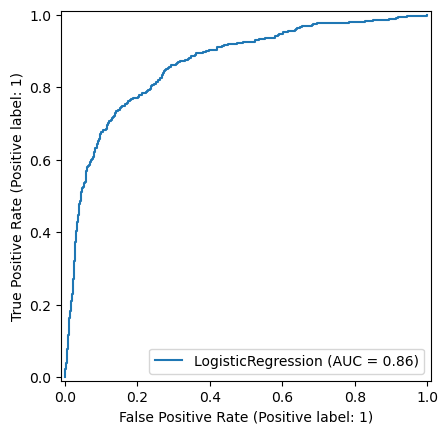

In [103]:
RocCurveDisplay.from_estimator(log_pca, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 0.818
    - Recall = 0.839
    - Precision = 0.805
- Test set
    - Accuracy = 0.792
    - Recall = 0.785
    - Precision = 0.211
    
Overall, the model is performing well in the test set, what it had learned from the train set.

## Decision Tree with PCA

In [104]:
# import decision tree classifier module
from sklearn.tree import DecisionTreeClassifier

In [105]:
# instantiate DecisionTreeClassifier

dt_pca = DecisionTreeClassifier(random_state=42) 

In [106]:
# fitting the model on the train
dt_pca_model = dt_pca.fit(X_train_pca, y_train)

##### Prediction on train data 

In [107]:
# Prediction on the train data
y_train_pred = dt_pca_model.predict(X_train_pca)

In [108]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[21663,     0],
       [    0, 21663]], dtype=int64)

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# checking accuracy score, recall score
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 1.0
Recall Score: 1.0
Specificity: 1.0


##### Prediction on test data 

In [111]:
# prediction on the train data
y_test_pred = dt_pca_model.predict(X_test_pca)

In [112]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[4706,  685],
       [ 222,  160]], dtype=int64)

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [114]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.8428893123159535
Recall Score: 0.418848167539267
Specificity: 0.872936375440549


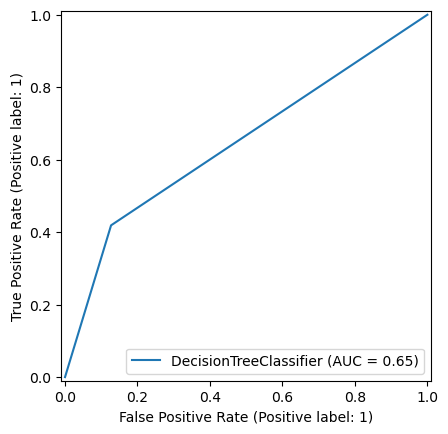

In [115]:
# plotting ROC curve
RocCurveDisplay.from_estimator(dt_pca, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Recall = 1.0
    - Precision = 1.0
- Test set
    - Accuracy = 0.834
    - Recall = 0.429
    - Precision = 0.182
    
Overall, the model is performing good in the test set, what it had learnt from the train set. It seems that we need to do hyperparameter tunings

## Hyperparameter tuning on Decision Tree with PCA

In [116]:
# import gridsearchcv module for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [117]:
# Creating the parameter grid 
params = {
            'max_depth': [3, 5, 10, 12, 15, 17, 20],
            'min_samples_split' : [10, 15, 20, 30, 50, 75, 100]
        }

# instantiate decisiontreeclassifier
dt_hyp = DecisionTreeClassifier()

# creating gridsearch model
grid_search = GridSearchCV(estimator=dt_hyp,
                           param_grid = params, 
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = 4,
                           verbose = 1
                          )


In [118]:
# fitting the gridsearch model

grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 49 candidates, totalling 196 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 12, 15, 17, 20],
                         'min_samples_split': [10, 15, 20, 30, 50, 75, 100]},
             scoring='recall', verbose=1)

In [119]:
# checking the best score and best estimator

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9115546034389401
DecisionTreeClassifier(max_depth=15, min_samples_split=10)


##### Model with optimal hyperparameters

In [120]:
# instantiating decision tree classifier with hyperparameter optimal value
dt_hyp_opt_model = DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42,criterion='gini')

# fitting this model into train data
dt_hyp_opt_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)

##### Prediction on train data

In [121]:
# Predictions on the train set
y_train_pred = dt_hyp_opt_model.predict(X_train_pca)

In [122]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[20125,  1538],
       [  367, 21296]], dtype=int64)

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# checking accuracy score, recall score
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.9560310206342612
Recall Score: 0.9830586714674792
Specificity: 0.9290033698010433


##### Prediction on test data 

In [125]:
# prediction on the train data
y_test_pred = dt_hyp_opt_model.predict(X_test_pca)

In [126]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[4598,  793],
       [ 165,  217]], dtype=int64)

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.834055084011779
Recall Score: 0.5680628272251309
Specificity: 0.852902986458913


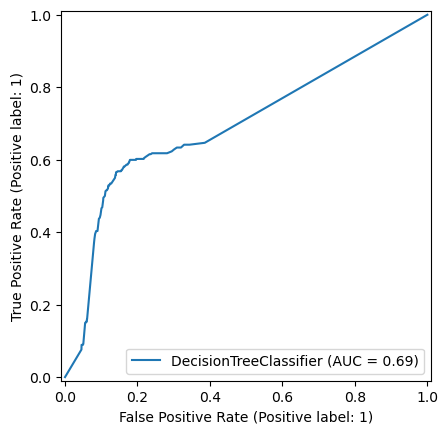

In [129]:
# plotting ROC curve
RocCurveDisplay.from_estimator(dt_hyp_opt_model, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 0.951
    - Recall = 0.977
    - Precision = 0.930
- Test set
    - Accuracy = 0.826
    - Recall = 0.568
    - Precision = 0.205
    
Overall, the model is performing worst in the test set, what it had learnt from the train set even after doing hyperparameter tuning. This is the case of overfitting.

## Random Forest Tree with PCA

In [130]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
# instantiante the RandomForestClassifier
rf_pca = RandomForestClassifier(random_state=42)

In [132]:
# fitting the model on the train
rf_pca_model = rf_pca.fit(X_train_pca, y_train)

##### Prediction on train data 

In [133]:
# prediction on the train data
y_train_pred = rf_pca_model.predict(X_train_pca)

In [134]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[21663,     0],
       [    1, 21662]], dtype=int64)

In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# checking accuracy score, recall score
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.9999769191709367
Recall Score: 0.9999538383418732
Specificity: 1.0


##### Prediction on test data 

In [137]:
# prediction on the train data
y_test_pred = rf_pca_model.predict(X_test_pca)

In [138]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[5128,  263],
       [ 212,  170]], dtype=int64)

In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.9177204226571973
Recall Score: 0.44502617801047123
Specificity: 0.9512149879428677


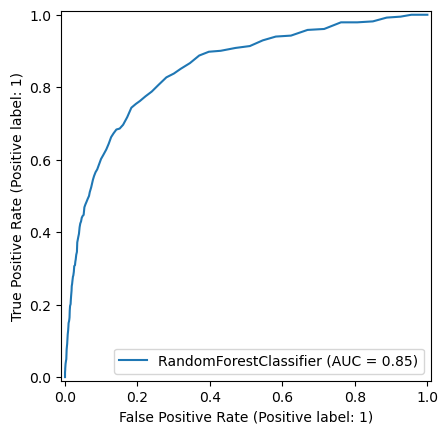

In [141]:
# plotting ROC curve
RocCurveDisplay.from_estimator(rf_pca_model, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 0.999
    - Recall = 0.999
    - Precision = 1.0
- Test set
    - Accuracy = 0.918
    - Recall = 0.455
    - Precision = 0.396
    
Overall, the model is not performing good in the test set, what it had learnt from the train set. It seems that we need to do hyperparameter tunings.

## Hyperparameter tuning on Random Forest with PCA

In [142]:
# import gridsearchcv module for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [143]:
# Creating the parameter grid 
params = {
            'n_estimators': [100, 150, 200],
            'max_depth': [5, 7, 9],
            'min_samples_split' : [20, 30, 50, 70, 100, 150],
            'max_features': [10, 20, 30]
        }

# instantiate decisiontreeclassifier
rf_hyp = RandomForestClassifier()

# creating gridsearch model
randomized_search = RandomizedSearchCV(estimator=rf_hyp,
                           param_distributions=params, 
                           scoring = 'recall',
                           n_jobs = -1,
                            n_iter = 10,
                           cv = 3,
                           verbose = 1,
                          )


In [144]:
# fitting the randomized search model

randomized_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9],
                                        'max_features': [10, 20, 30],
                                        'min_samples_split': [20, 30, 50, 70,
                                                              100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='recall', verbose=1)

In [168]:
# checking the best score and best estimator

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9115546034389401
DecisionTreeClassifier(max_depth=15, min_samples_split=10)
{'max_depth': 15, 'min_samples_split': 10}


##### Model with optimal hyperparameters

In [146]:
# instantiating decision tree classifier with hyperparameter optimal value
rf_hyp_opt_model = RandomForestClassifier(max_depth=15, min_samples_split=10, max_features = 20, n_estimators = 150, 
                                          random_state=42)

# fitting this model into train data
rf_hyp_opt_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=15, max_features=20, min_samples_split=10,
                       n_estimators=150, random_state=42)

##### Prediction on train data

In [147]:
# Predictions on the train set
y_train_pred = rf_hyp_opt_model.predict(X_train_pca)

In [148]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[20716,   947],
       [   55, 21608]], dtype=int64)

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# checking accuracy score, recall score
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.9768730092784933
Recall Score: 0.9974611088030282
Specificity: 0.9562849097539584


##### Prediction on test data 

In [151]:
# prediction on the train data
y_test_pred = rf_hyp_opt_model.predict(X_test_pca)

In [152]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[4966,  425],
       [ 172,  210]], dtype=int64)

In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.896587562792309
Recall Score: 0.5497382198952879
Specificity: 0.9211649044704137


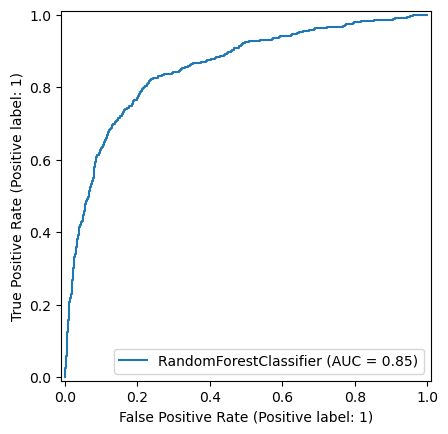

In [155]:
# plotting ROC curve
RocCurveDisplay.from_estimator(rf_hyp_opt_model, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 0.977
    - Recall = 0.998
    - Precision = 0.958
- Test set
    - Accuracy = 0.897
    - Recall = 0.554
    - Precision = 0.335

After fine-tuning the RandomForest Classifier, the model has shown overall improvement compared to its base model. However, there has been a decline in the recall score while evaluating the model on the test set.

## XGBoost with PCA 

In [156]:
# import XGBoost classifier
from xgboost import XGBClassifier

In [157]:
# instantiate the RandomForestClassifier
xgb_pca = XGBClassifier(random_state=42)

In [158]:
# fitting the model on the train
xgb_pca_model = xgb_pca.fit(X_train_pca, y_train)

##### Prediction on train data 

In [159]:
# prediction on the train data
y_train_pred = xgb_pca_model.predict(X_train_pca)

In [160]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[21195,   468],
       [   51, 21612]], dtype=int64)

In [161]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# checking accuracy score, recall score
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.9880210497161058
Recall Score: 0.9976457554355352
Specificity: 0.9783963439966764


##### Prediction on test data 

In [163]:
# prediction on the train data
y_test_pred = xgb_pca_model.predict(X_test_pca)

In [164]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[4998,  393],
       [ 173,  209]], dtype=int64)

In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.9019573878399446
Recall Score: 0.5471204188481675
Specificity: 0.9271007234279355


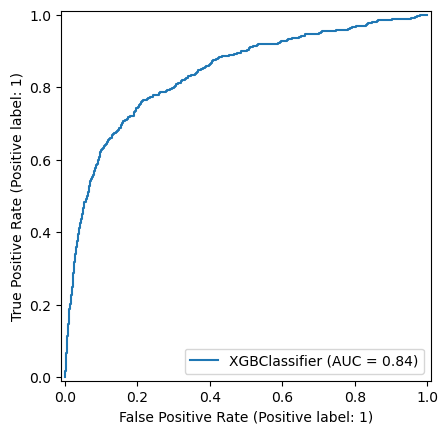

In [167]:
# plotting ROC curve
RocCurveDisplay.from_estimator(xgb_pca_model, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 0.989
    - Recall = 0.997
    - Precision = 0.981
- Test set
    - Accuracy = 0.903
    - Recall = 0.523
    - Precision = 0.346
    
Overall, the model is not performing well in the test set, what it had learned from the train set. It seems that we need to do hyperparameter tuning.

## Hyperparameter tuning on XGBoost Tree with PCA

In [200]:
# import randomized search module for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [201]:
# Creating the parameter grid 
params = {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 7, 9],
            'min_samples_split' : [20, 30, 50, 70, 100, 150],
            'min_child_weight': [1, 3, 5],
            'learning_rate' : [0.01, 0.005, 0.001],
            'gamma': [0, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'scale_pos_weight': [1, 3, 5, 10]
        }

# instantiate XGBoostclassifier
xgb_hyp = XGBClassifier()

# Creating randomized search model
randomized_search = RandomizedSearchCV(estimator=xgb_hyp,
                           param_distributions=params, 
                           scoring = 'recall',
                           n_jobs = -1,
                            n_iter = 10,
                           cv = 3,
                           verbose = 1,
                          )



In [202]:
# fitting the gridsearch model

randomized_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.005, 0.001],
                                        'max_depth': [5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'min_samples_split': [20, 30, 50, 70,
                                                              100, 150],
                                        'n_estimators': [50, 100, 150],
                                        'scale_pos_weight': [1, 3, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='recall', verbose=1)

In [203]:
# checking the best score and best estimator

print(randomized_search.best_score_)
print(randomized_search.best_estimator_)

1.0
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, min_samples_split=30, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


##### Model with optimal hyperparameters

In [204]:
# instantiating decision tree classifier with hyperparameter optimal value
xgb_hyp_opt_model = XGBClassifier(n_estimators=100, max_depth=5, min_samples_split=30, min_child_weight=1, gamma=0, 
                                  learning_rate=0.001, colsample_bytree=0.6, random_state =42)

# fitting this model into train data
xgb_hyp_opt_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, min_samples_split=30, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

##### Prediction on train data

In [205]:
# Predictions on the train set
y_train_pred = xgb_hyp_opt_model.predict(X_train_pca)

In [206]:
# checking confusion matrix

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[18368,  3295],
       [ 4372, 17291]], dtype=int64)

In [207]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [208]:
# checking accuracy score, recall score
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print('Recall Score:', recall_score(y_train, y_train_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.8230392835710659
Recall Score: 0.7981812306698056
Specificity: 0.8478973364723261


##### Prediction on test data 

In [209]:
# prediction on the train data
y_test_pred = xgb_hyp_opt_model.predict(X_test_pca)

In [210]:
# checking confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[4561,  830],
       [ 113,  269]], dtype=int64)

In [211]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [212]:
# checking accuracy score, recall score 
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))
print('Specificity:', TN/(TN + FP))

Accuracy Score: 0.8366533864541833
Recall Score: 0.7041884816753927
Specificity: 0.8460396957892784


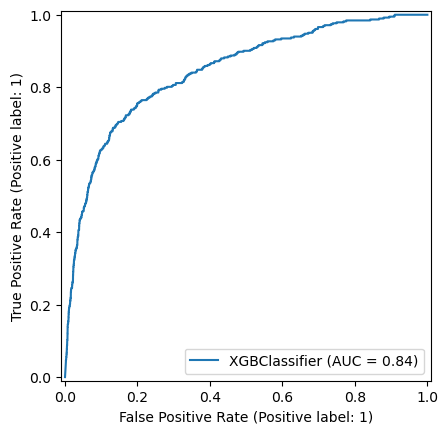

In [213]:
# plotting ROC curve
RocCurveDisplay.from_estimator(xgb_hyp_opt_model, X_test_pca, y_test)

***Model summary***

- Train set
    - Accuracy = 0.824
    - Recall = 0.798
    - Precision = 0.839
- Test set
    - Accuracy = 0.827
    - Recall = 0.704
    - Precision = 0.234
    
After fine-tuning the XGBoost Classifier, the model has shown overall improvement compared to its base model. However, there has been a decline in the recall score while evaluating the model on the test set.

## Final Conclusion

After experimenting with various models, we've found that Logistic Regression and XGBoost demonstrate strong performance in achieving our primary goal of maximizing recall score/sensitivity. However, Logistic Regression stands out with a recall score of 78% and an accuracy of 79%, surpassing the performance of the XGBoost model. Hence, Logistic Regression emerges as the algorithm with the most optimal performance for identifying churn customers.

## Filtering out the Important Features for target variable (Churn) from Logistic Regression model  

## Logistic Regression without PCA

In [214]:
# importing stats model
import statsmodels.api as sm

In [215]:
#instantiating the model and adding constant to X_train
log_no_pca = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())

In [216]:
# fitting the model and showing summary
log_no_pca.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43192
Model Family:                Binomial   Df Model:                          133
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 May 2024   Deviance:                   1.3788e+05
Time:                        18:30:17   Pearson chi2:                 6.74e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.524e+15   1.04e+06   1.47e+09      0.000    1.52e+15    1.52e+15
arpu_6                    1.467e+23   5.86e+16    2.5e+06      0.000    1.47e+23    1.47e+23
arpu_7                    1.576e+23    6.3e+16    2.5e+06      0.000    1.58e+23    1.58e+23
arpu_8                   -4.245e+23    1.7e+17   -2.5e+06      0.000   -4.25e+23   -4.25e+23
onnet_mou_6               1.596e+15   3.28e+07   4.87e+07      0.000     1.6e+15     1.6e+15
onnet_mou_7              -7.845e+14   2.34e+07  -3.36e+07      0.000   -7.84e+14   -7.84e+14
onnet_mou_8               2.245e+14   1.97e+07   1.14e+07      0.000    2.25e+14    2.25e+14
offnet_mou_6              1.502e+15   3.19e+07   4.71e+07      0.000     1.5e+15     1.5e+15
offnet_mou_7             -5.584e+14    2.3e+07  -2.42e+07      0.000   -5.58e+14   -5.58e+14
offnet_mou_8              8.101e+13   1.91e+07   4.24e+06      0.000     8.1e+13     8.1e+13
roam_ic_mou_6            -1.032e+13   5.65e+05  -1.83e+07      0.000   -1.03e+13   -1.03e+13
roam_ic_mou_7             2.535e+13   6.78e+05   3.74e+07      0.000    2.54e+13    2.54e+13
roam_ic_mou_8            -2.114e+13   5.91e+05  -3.58e+07      0.000   -2.11e+13   -2.11e+13
roam_og_mou_6             -4.24e+14   9.34e+06  -4.54e+07      0.000   -4.24e+14   -4.24e+14
roam_og_mou_7             1.462e+14   5.73e+06   2.55e+07      0.000    1.46e+14    1.46e+14
roam_og_mou_8            -7.163e+13   5.69e+06  -1.26e+07      0.000   -7.16e+13   -7.16e+13
loc_og_t2t_mou_6         -7.141e+17   1.37e+10  -5.21e+07      0.000   -7.14e+17   -7.14e+17
loc_og_t2t_mou_7          -3.49e+17   1.33e+10  -2.63e+07      0.000   -3.49e+17   -3.49e+17
loc_og_t2t_mou_8          -1.17e+18   1.27e+10  -9.23e+07      0.000   -1.17e+18   -1.17e+18
loc_og_t2m_mou_6         -6.905e+17   1.33e+10  -5.21e+07      0.000   -6.91e+17   -6.91e+17
loc_og_t2m_mou_7         -3.447e+17   1.31e+10  -2.63e+07      0.000   -3.45e+17   -3.45e+17
loc_og_t2m_mou_8         -1.193e+18   1.29e+10  -9.22e+07      0.000   -1.19e+18   -1.19e+18
loc_og_t2f_mou_6         -8.389e+16   1.61e+09   -5.2e+07      0.000   -8.39e+16   -8.39e+16
loc_og_t2f_mou_7         -3.752e+16   1.43e+09  -2.63e+07      0.000   -3.75e+16   -3.75e+16
loc_og_t2f_mou_8         -9.648e+16   1.05e+09  -9.23e+07      0.000   -9.65e+16   -9.65e+16
loc_og_t2c_mou_6          2.177e+12   4.46e+05   4.88e+06      0.000    2.18e+12    2.18e+12
loc_og_t2c_mou_7         -8.708e+12   5.24e+05  -1.66e+07      0.000   -8.71e+12   -8.71e+12
loc_og_t2c_mou_8         -1.843e+13   4.32e+05  -4.27e+07      0.000   -1.84e+13   -1.84e+13
loc_og_mou_6                2.2e+17   2.59e+10   8.49e+06      0.000     2.2e+17     2.2e+17
loc_og_mou_7              8.297e+17   2.66e+10   3.12e+07      0.000     8.3e+17     8.3e+17
loc_og_mou_8  

**Model Analysis:**

We can see that a few features have positive coefficients and a few have negative.


### Feature Selection Using RFE

In [217]:
# instantiating the logistic regression modrl
logreg = LogisticRegression()

#### RFE with 15 columns

In [218]:
# importing RFE
from sklearn.feature_selection import RFE

In [219]:
# instantiating RFE with 15 columns
rfe = RFE(estimator = logreg, n_features_to_select = 15)

# Fitting the rfe model with the train set
rfe = rfe.fit(X_train, y_train)

In [220]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'monthly_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7',
       'total_mou_action', 'avg_rech_num_good', 'diff_rech_num',
       'decrease_rech_num_action'],
      dtype='object')


### Building Model-1 with RFE Selected Columns

In [221]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

# instantiate the model
logreg_no_pca_m1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial() )

# fitting the model
logreg_no_pca_m1 = logreg_no_pca_m1.fit()

# showing summary
logreg_no_pca_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43310
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4143.1
Date:                Sun, 05 May 2024   Deviance:                       8286.3
Time:                        18:32:01   Pearson chi2:                 8.77e+05
No. Iterations:                    35   Pseudo R-squ. (CS):             0.6973
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      390.9742   1.63e+05      0.002      0.998   -3.19e+05     3.2e+05
std_og_mou_8                 1.1942      0.153      7.785      0.000       0.894       1.495
loc_ic_mou_7                 0.5551      0.059      9.386      0.000       0.439       0.671
loc_ic_mou_8                -1.1797      0.178     -6.645      0.000      -1.528      -0.832
total_rech_num_6         -1079.8399   3.32e+06     -0.000      1.000    -6.5e+06     6.5e+06
total_rech_num_7         -1075.1911    3.3e+06     -0.000      1.000   -6.47e+06    6.47e+06
total_rech_num_8          -272.1497   2.72e+06  -9.99e-05      1.000   -5.34e+06    5.34e+06
total_rech_amt_6         -3.774e+05   2.17e+08     -0.002      0.999   -4.25e+08    4.24e+08
total_rech_amt_7         -4.041e+05   2.32e+08     -0.002      0.999   -4.55e+08    4.54e+08
monthly_2g_8                -0.3861      0.047     -8.131      0.000      -0.479      -0.293
monthly_3g_8                -0.5082      0.060     -8.416      0.000      -0.627      -0.390
avg_rech_amt_6_7          6.936e+05   3.98e+08      0.002      0.999    -7.8e+08    7.81e+08
total_mou_action            -2.1287      0.208    -10.257      0.000      -2.535      -1.722
avg_rech_num_good         2216.5154   4.95e+06      0.000      1.000   -9.71e+06    9.71e+06
diff_rech_num              239.0250    2.4e+06   9.97e-05      1.000    -4.7e+06     4.7e+06
decrease_rech_num_action     0.1535      0.093      1.644      0.100      -0.029       0.337
============================================================================================
"""

Many features have higher p-values and hence became insignificant in the model.


#### Checking VIFs

In [222]:
# check for the VIF value for the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [223]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,avg_rech_amt_6_7,6998064.63
7,total_rech_amt_7,2375599.00
6,total_rech_amt_6,2072256.54
12,avg_rech_num_good,2498.15
5,total_rech_num_8,1403.70
13,diff_rech_num,1087.58
3,total_rech_num_6,667.62
4,total_rech_num_7,665.68
11,total_mou_action,7.61
2,loc_ic_mou_8,5.43


**Analysis:**

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'avg_rech_amt_6_7' has the highest VIF 6998064.63 and P-value 1.0 So let's start by dropping that.

##### Removing column avg_rech_amt_6_7 

In [224]:
# dropping the avg_rech_amt_6_7 column
rfe_cols = rfe_cols.drop('avg_rech_amt_6_7', 1)
rfe_cols

Index(['std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'monthly_2g_8', 'monthly_3g_8', 'total_mou_action',
       'avg_rech_num_good', 'diff_rech_num', 'decrease_rech_num_action'],
      dtype='object')

### Model-2

##### Building the model after removing avg_rech_amt_6_7 variable.

In [225]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[rfe_cols])

# instantiate the model
logreg_no_pca_m2 = sm.GLM(y_train, X_train_sm_2, family = sm.families.Binomial() )

# fitting the model
logreg_no_pca_m2 = logreg_no_pca_m2.fit()

# showing summary
logreg_no_pca_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43311
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4189.3
Date:                Sun, 05 May 2024   Deviance:                       8378.7
Time:                        18:32:02   Pearson chi2:                 9.77e+05
No. Iterations:                    37   Pseudo R-squ. (CS):             0.6967
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.205e+04   2.04e+05      0.108      0.914   -3.77e+05    4.21e+05
std_og_mou_8                 1.2224      0.154      7.923      0.000       0.920       1.525
loc_ic_mou_7                 0.5447      0.059      9.209      0.000       0.429       0.661
loc_ic_mou_8                -1.1690      0.178     -6.568      0.000      -1.518      -0.820
total_rech_num_6         -4.185e+05   5.94e+06     -0.070      0.944   -1.21e+07    1.12e+07
total_rech_num_7         -4.168e+05   5.92e+06     -0.070      0.944    -1.2e+07    1.12e+07
total_rech_num_8         -8.298e+04      1e+07     -0.008      0.993   -1.98e+07    1.96e+07
total_rech_amt_6             0.1983      0.038      5.195      0.000       0.123       0.273
total_rech_amt_7             0.0944      0.036      2.589      0.010       0.023       0.166
monthly_2g_8                -0.3617      0.045     -8.037      0.000      -0.450      -0.273
monthly_3g_8                -0.5184      0.061     -8.563      0.000      -0.637      -0.400
total_mou_action            -2.1850      0.209    -10.471      0.000      -2.594      -1.776
avg_rech_num_good         8.373e+05   7.81e+06      0.107      0.915   -1.45e+07    1.62e+07
diff_rech_num             7.301e+04   8.83e+06      0.008      0.993   -1.72e+07    1.74e+07
decrease_rech_num_action     0.1780      0.093      1.911      0.056      -0.005       0.361
============================================================================================
"""

#### Checking VIFs for Model-2

In [226]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_8,1274.07
11,avg_rech_num_good,1269.57
12,diff_rech_num,988.70
4,total_rech_num_7,490.74
3,total_rech_num_6,490.38
10,total_mou_action,7.58
2,loc_ic_mou_8,5.43
0,std_og_mou_8,4.94
1,loc_ic_mou_7,3.14
7,total_rech_amt_7,2.26


**Analysis:**

- As we can see from the P-value and VIF table, the total_rech_num_8 variable is insignificant as it has the highest VIF of 7.41 and the highest p-value of 0.993 Hence dropping this variable from the RFE selected column list
  

##### Removing column total_rech_num_8

In [227]:
# dropping the total_rech_num_8 column
rfe_cols = rfe_cols.drop('total_rech_num_8', 1)
rfe_cols

Index(['std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7',
       'monthly_2g_8', 'monthly_3g_8', 'total_mou_action', 'avg_rech_num_good',
       'diff_rech_num', 'decrease_rech_num_action'],
      dtype='object')

### Model-3

##### Building the model after removing total_rech_num_8 variable.

In [228]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[rfe_cols])

# instantiate the model
logreg_no_pca_m3 = sm.GLM(y_train, X_train_sm_3, family = sm.families.Binomial() )

# fitting the model
logreg_no_pca_m3 = logreg_no_pca_m3.fit()

# showing summary
logreg_no_pca_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43312
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4365.3
Date:                Sun, 05 May 2024   Deviance:                       8730.6
Time:                        18:32:03   Pearson chi2:                 1.37e+06
No. Iterations:                    73   Pseudo R-squ. (CS):             0.6942
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.819e+04   1.97e+05      0.092      0.926   -3.68e+05    4.04e+05
std_og_mou_8                 1.2150      0.151      8.064      0.000       0.920       1.510
loc_ic_mou_7                 0.5080      0.059      8.590      0.000       0.392       0.624
loc_ic_mou_8                -1.1241      0.174     -6.477      0.000      -1.464      -0.784
total_rech_num_6         -3.802e+05   4.11e+06     -0.092      0.926   -8.44e+06    7.68e+06
total_rech_num_7         -3.786e+05    4.1e+06     -0.092      0.926   -8.41e+06    7.65e+06
total_rech_amt_6             0.2153      0.037      5.748      0.000       0.142       0.289
total_rech_amt_7             0.0947      0.036      2.611      0.009       0.024       0.166
monthly_2g_8                -0.3795      0.045     -8.449      0.000      -0.468      -0.291
monthly_3g_8                -0.5503      0.061     -9.041      0.000      -0.670      -0.431
total_mou_action            -2.2109      0.204    -10.864      0.000      -2.610      -1.812
avg_rech_num_good         6.874e+05   7.44e+06      0.092      0.926   -1.39e+07    1.53e+07
diff_rech_num               -0.4355      0.052     -8.427      0.000      -0.537      -0.334
decrease_rech_num_action     0.0244      0.089      0.276      0.782      -0.149       0.198
============================================================================================
"""

#### Checking VIFs for Model-3

In [229]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,avg_rech_num_good,1113.76
4,total_rech_num_7,342.25
3,total_rech_num_6,339.82
9,total_mou_action,7.57
2,loc_ic_mou_8,5.43
0,std_og_mou_8,4.94
1,loc_ic_mou_7,3.13
6,total_rech_amt_7,2.26
5,total_rech_amt_6,2.22
11,diff_rech_num,2.01


**Analysis:**

- As we can see from the P-value and VIF table, the avg_rech_num_good variable is insignificant as it has the highest VIF of 1113.76 and highest p-value of 0.926 Hence dropping this variable from the RFE selected column list

##### Removing column avg_rech_num_good


In [230]:
# dropping the avg_rech_num_good column
rfe_cols = rfe_cols.drop('avg_rech_num_good', 1)
rfe_cols

Index(['std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7',
       'monthly_2g_8', 'monthly_3g_8', 'total_mou_action', 'diff_rech_num',
       'decrease_rech_num_action'],
      dtype='object')

### Model-4

##### Building the model after removing avg_rech_num_good variable.

In [231]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[rfe_cols])

# instantiate the model
logreg_no_pca_m4 = sm.GLM(y_train, X_train_sm_4, family = sm.families.Binomial() )

# fitting the model
logreg_no_pca_m4 = logreg_no_pca_m4.fit()

# showing summary
logreg_no_pca_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43313
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19763.
Date:                Sun, 05 May 2024   Deviance:                       39527.
Time:                        18:32:04   Pearson chi2:                 2.56e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3775
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3317      0.030     11.131      0.000       0.273       0.390
std_og_mou_8                 1.1197      0.049     22.945      0.000       1.024       1.215
loc_ic_mou_7                 0.6888      0.033     21.096      0.000       0.625       0.753
loc_ic_mou_8                -1.0261      0.061    -16.938      0.000      -1.145      -0.907
total_rech_num_6            -0.3850      0.025    -15.394      0.000      -0.434      -0.336
total_rech_num_7             0.0465      0.022      2.085      0.037       0.003       0.090
total_rech_amt_6             0.2950      0.023     13.101      0.000       0.251       0.339
total_rech_amt_7             0.2460      0.025      9.701      0.000       0.196       0.296
monthly_2g_8                -0.8042      0.030    -26.878      0.000      -0.863      -0.746
monthly_3g_8                -0.8496      0.030    -28.032      0.000      -0.909      -0.790
total_mou_action            -1.9935      0.067    -29.869      0.000      -2.124      -1.863
diff_rech_num               -0.9633      0.028    -34.967      0.000      -1.017      -0.909
decrease_rech_num_action    -0.9986      0.036    -27.661      0.000      -1.069      -0.928
============================================================================================
"""

#### Checking VIFs for Model-4

In [232]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_mou_action,7.41
2,loc_ic_mou_8,5.41
0,std_og_mou_8,4.89
1,loc_ic_mou_7,3.13
3,total_rech_num_6,2.97
4,total_rech_num_7,2.49
6,total_rech_amt_7,2.26
5,total_rech_amt_6,2.21
10,diff_rech_num,1.95
11,decrease_rech_num_action,1.12


**Analysis:**

- As we can see from the P-value and VIF table, the total_mou_action variable is insignificant as it has the highest VIF of 7.41 Hence dropping this variable from the RFE selected column list

##### Removing column avg_rech_num_good


In [233]:
# dropping the total_mou_action column
rfe_cols = rfe_cols.drop('total_mou_action', 1)
rfe_cols

Index(['std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7',
       'monthly_2g_8', 'monthly_3g_8', 'diff_rech_num',
       'decrease_rech_num_action'],
      dtype='object')

### Model-5

##### Building the model after removing total_mou_action variable.

In [234]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[rfe_cols])

# instantiate the model
logreg_no_pca_m5 = sm.GLM(y_train, X_train_sm_5, family = sm.families.Binomial() )

# fitting the model
logreg_no_pca_m5 = logreg_no_pca_m5.fit()

# showing summary
logreg_no_pca_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43314
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20358.
Date:                Sun, 05 May 2024   Deviance:                       40716.
Time:                        18:32:04   Pearson chi2:                 7.06e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3602
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3033      0.029     10.282      0.000       0.245       0.361
std_og_mou_8                -0.2593      0.016    -16.709      0.000      -0.290      -0.229
loc_ic_mou_7                 0.7505      0.032     23.226      0.000       0.687       0.814
loc_ic_mou_8                -2.3949      0.044    -54.218      0.000      -2.481      -2.308
total_rech_num_6            -0.4076      0.025    -16.528      0.000      -0.456      -0.359
total_rech_num_7             0.0563      0.022      2.563      0.010       0.013       0.099
total_rech_amt_6             0.2388      0.021     11.148      0.000       0.197       0.281
total_rech_amt_7             0.0919      0.023      4.055      0.000       0.048       0.136
monthly_2g_8                -0.7903      0.030    -26.610      0.000      -0.849      -0.732
monthly_3g_8                -0.8044      0.030    -27.141      0.000      -0.863      -0.746
diff_rech_num               -1.0971      0.027    -39.957      0.000      -1.151      -1.043
decrease_rech_num_action    -0.9667      0.036    -27.218      0.000      -1.036      -0.897
============================================================================================
"""

#### Checking VIFs for Model-5

In [235]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,3.24
1,loc_ic_mou_7,3.13
3,total_rech_num_6,2.96
4,total_rech_num_7,2.49
6,total_rech_amt_7,2.21
5,total_rech_amt_6,2.20
9,diff_rech_num,1.88
0,std_og_mou_8,1.38
10,decrease_rech_num_action,1.12
8,monthly_3g_8,1.06


**Analysis:**

- As we can see from the P-value and VIF table, there is no insignificant features available in the VIF table as well as P-value table because all the feature's VIF value are below 5 and P-value are near to 0
-  Hence, we can conclused that ***Model-5 logreg_no_pca_5 will be the final model***.

###  Model performance on the train set

In [236]:
# Getting the predicted value on the train set
y_train_pred_no_pca = logreg_no_pca_m5.predict(X_train_sm_5)
y_train_pred_no_pca.head()

0    0.001569
1    0.654966
2    0.287416
3    0.453266
4    0.114157
dtype: float64

#### Creating a dataframe with the actual churn and the predicted probabilities

In [237]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.001569,0
1,1,0.654966,1
2,0,0.287416,2
3,0,0.453266,3
4,0,0.114157,4


#### Finding Optimal Probablity Cutoff Point

In [238]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001569,0,1,0,0,0,0,0,0,0,0,0
1,1,0.654966,1,1,1,1,1,1,1,1,0,0,0
2,0,0.287416,2,1,1,1,0,0,0,0,0,0,0
3,0,0.453266,3,1,1,1,1,1,0,0,0,0,0
4,0,0.114157,4,1,1,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [239]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives


for i in prob_cutoff:
    cm1 = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.649610     0.976965     0.322255
0.2          0.2  0.697803     0.959516     0.436089
0.3          0.3  0.736925     0.936528     0.537322
0.4          0.4  0.770484     0.898260     0.642709
0.5          0.5  0.800789     0.850852     0.750727
0.6          0.6  0.806767     0.765406     0.848128
0.7          0.7  0.761875     0.600886     0.922864
0.8          0.8  0.664889     0.364677     0.965102
0.9          0.9  0.560310     0.134007     0.986613


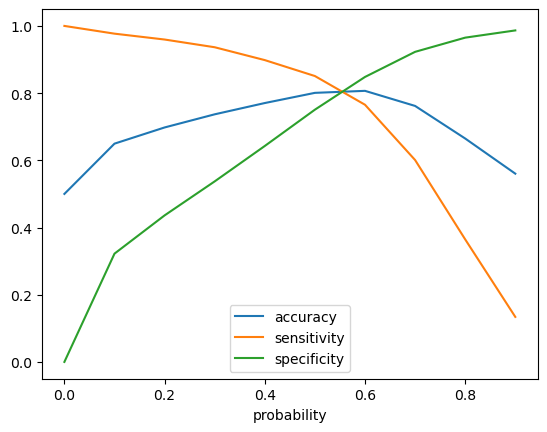

In [240]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.58` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.58 as the optimum probability cutoff, we are taking ***0.5*** for acheiving higher sensitivity, which is our main goal.

In [241]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.58 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.001569,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.654966,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.287416,2,1,1,1,0,0,0,0,0,0,0,0
3,0,0.453266,3,1,1,1,1,1,0,0,0,0,0,0
4,0,0.114157,4,1,1,0,0,0,0,0,0,0,0,0


##### Performance Metrics

In [242]:
# Confusion metrics
confusion = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[17968  3695]
 [ 4591 17072]]


In [243]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [244]:
# Accuracy
print("Accuracy:-",accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8087522503808336
Sensitivity:- 0.7880718275400452
Specificity:- 0.8294326732216222


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [245]:
from sklearn.metrics import roc_curve, roc_auc_score

In [246]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

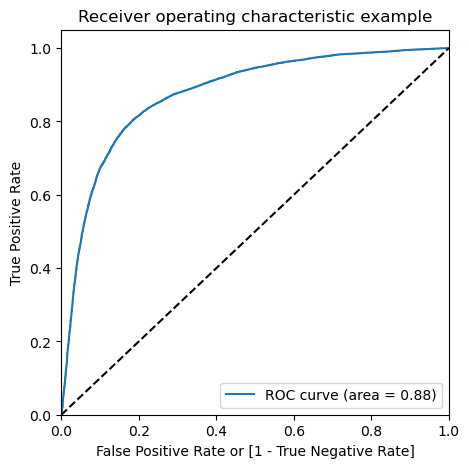

In [247]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [248]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [249]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[rfe_cols]

In [250]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [251]:
# Predict on the test set
y_test_pred = logreg_no_pca_m5.predict(X_test_sm)

In [252]:
y_test_pred.head()

43200    0.005429
69487    0.236257
88282    0.043142
22344    0.330452
11105    0.238288
dtype: float64

In [253]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
43200,0.005429
69487,0.236257
88282,0.043142
22344,0.330452
11105,0.238288


In [254]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
43200,0
69487,0
88282,0
22344,0
11105,0


In [255]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [256]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [257]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [258]:
y_test_pred_final.head()

,churn,CustID,0
0,0,43200,0.005429
1,0,69487,0.236257
2,0,88282,0.043142
3,0,22344,0.330452
4,0,11105,0.238288


In [259]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [260]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [261]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,43200,0,0.005429
1,69487,0,0.236257
2,88282,0,0.043142
3,22344,0,0.330452
4,11105,0,0.238288


In [262]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [263]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,43200,0,0.005429,0
1,69487,0,0.236257,0
2,88282,0,0.043142,0
3,22344,0,0.330452,0
4,11105,0,0.238288,0


##### Metrics

In [264]:
# Confusion matrix
confusion = confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4070 1321]
 [  76  306]]


In [265]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [266]:
# Accuracy
print("Accuracy:-", accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.7580114325307465
Sensitivity:- 0.8010471204188482
Specificity:- 0.7549619736598033


***Model summary***

- Train set
    - Accuracy = 0.774
    - Sensitivity = 0.834
    - Specificity = 0.713
- Test set
    - Accuracy = 0.716
    - Sensitivity = 0.803
    - Specificity = 0.710
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

# Important churn indicators & Actionable recommendations

#### Top predictors

Below are a few top variables selected in the logistic regression model.
|Variables       | Coefficient |
|----------------|-------------|
|loc_ic_mou_8   |	-2.3949|
|diff_rech_num	|-1.0971|
|decrease_rech_num_action	|-0.9667|
|monthly_3g_8	|-0.8044|
|monthly_2g_8	|-0.7903|
|loc_ic_mou_7|	0.7505|
|total_rech_num_6	|-0.4076|
|std_og_mou_8	|-0.2593|
|total_rech_amt_6	|0.2388|
|total_rech_amt_7	|0.0919|
|total_rech_num_7	|0.0563|



We can see most of the top variables have negative coefficients. That means the variables are inversely correlated with the churn probability.

### loc_ic_mou_8 (Local Incoming Minutes in August):
A decrease in local incoming call usage in August compared to other months suggests a higher likelihood of churn.
### diff_rech_num (Difference in Recharge Frequency): 
A reduction in the number of times a customer recharges indicates a higher probability of churn.
### decrease_rech_num_action (Decrease in Recharge Frequency Action): 
Similar to diff_rech_num, a decrease in recharge frequency in the action month (August) is associated with a higher churn probability.
### monthly_3g_8 (3G Data Usage in August):
Reduction in 3G data usage in August compared to previous months indicates a higher chance of churn.
### monthly_2g_8 (2G Data Usage in August): 
A decrease in 2G data usage in August compared to previous months suggests a higher likelihood of churn.
### loc_ic_mou_7 (Local Incoming Minutes in July): 
An increase in local incoming call usage in July compared to other months indicates a higher churn probability.
### total_rech_num_6 (Total Recharge Number in June): 
A decrease in the total number of recharges in June compared to other others suggests a higher churn probability.
### std_og_mou_8 (Standard Outgoing Minutes in August): 
A decrease in standard outcoming call usage in August compared to other months suggests a higher likelihood of churn.
### total_rech_amt_6 (Total Recharge Amount in June):
An increase in the total amount of recharges in June indicates a higher churn probability.
### total_rech_amt_7 (Total Recharge Amount in July): 
An increase in the total amount of recharges in July indicates a higher churn probability.
### total_rech_num_7 (Total Recharge Number in July): 
An increase in the total number of recharges in July indicates a higher churn probability.



#### Hence as soon as the about indicators show up make sure the candidate is offered promotional offers to continue service





